# Week 7 Lab - Feature Engineering

BUSAN302

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid', font_scale = 1.5,
              rc={'figure.figsize':(7,5)})

#plt.rc('figure', dpi=100, figsize=(7, 5))
#plt.rc('font', size=12)
rng = np.random.default_rng()

## Functional relations

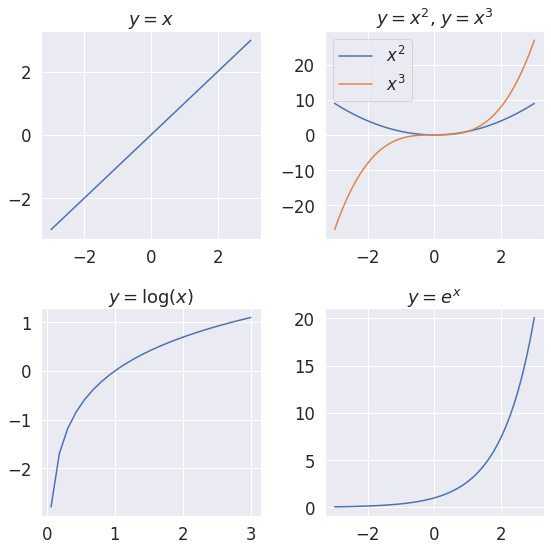

In [ ]:
x = np.linspace(-3, 3)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

# x
ax1.plot(x, x)
ax1.set_title('$y=x$')

# powers
ax2.plot(x, x**2, label='$x^2$')
ax2.plot(x, x**3, label='$x^3$')
ax2.legend()
ax2.set_title('$y=x^2$, $y=x^3$')

# log
xpos = x[x>0]  # Log is only defined for positive x
ax3.plot(xpos, np.log(xpos))
ax3.set_title(r'$y=\log(x)$')

# exp
ax4.plot(x, np.exp(x))
ax4.set_title('$y=e^x$');
plt.tight_layout();

# Transformations: Tukey's ladder of powers

The Tukey ladder of powers (sometimes called the Bulging Rule) is a way to change the shape of a skewed distribution so that it becomes normal or nearly-normal. It can also help to reduce error variability (heteroscedasticity).

Tukey (1977) created a table of powers (numbers to which data can be raised). It’s possible to have an infinite number of powers, but very few are actually in common use. The following table shows the most commonly used transformations, with exponents ranging from -2 to 2.

Going up the ladder reduces negative skew. To choose a transformation for negative skew, start with Y2, then plot the data to see how the transformation has affected the data. An exponential function such as Y2 will have a greater effect on larger numbers: 1,000 will become 1,000,000 while 5 will become 25. Due to the fact that y2 increases large numbers by such a massive amount, it’s rare to see transformations above y2.

For positive skews, start with log Y and move down the ladder, plotting as you go to see the effects. Logarithmic functions (with base 10) reduce large numbers more than small numbers. For example, 100,000 reduces to 5 and 100 reduces to 2. 

<img src='https://busan302.mycourses.work/images/bulge.png' width=350>

<img src='https://busan302.mycourses.work/images/tukey-ladder-of-powers.png'>

 [[See source article here for more!](https://www.statisticshowto.com/tukey-ladder-of-powers/)]

## A synthetic example

Let's generate data that follows $y = 2x^3 + \epsilon$, where $\epsilon$ is zero-mean noise. Note that given the functional form of $y$, if we simply draw $\epsilon \sim \mathcal{N}(0,1)$, it will be insignificant for higher values of $x$ (in the range we'll look, $[1..10]$). So we will make $\epsilon \sim x^2\mathcal{N}(0,1)$ so that the noise is present for all values of $x$ and $y$.

In [ ]:
import numpy as np
x = np.linspace(1, 10, 20)
eps = rng.normal(size=len(x))
y = (2+eps)*x**3
y = 2 * x**3 + x**2*eps

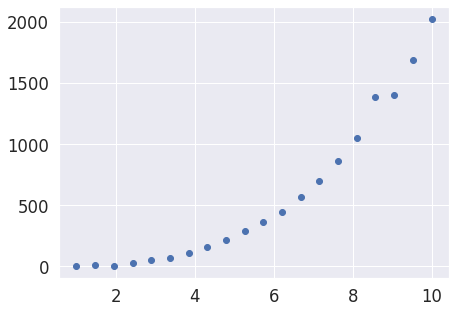

In [ ]:
plt.scatter(x, y);

The bulge diagram says to raise $x$ to a power, or to take the log of $y$.

First, let's raise $x$ to a power:

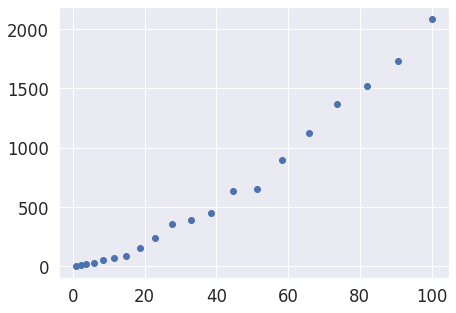

In [ ]:
plt.scatter(x**2, y);

We used $x^2$ as the transformation. It's better, but still not linear.
Let's try $x^3$.

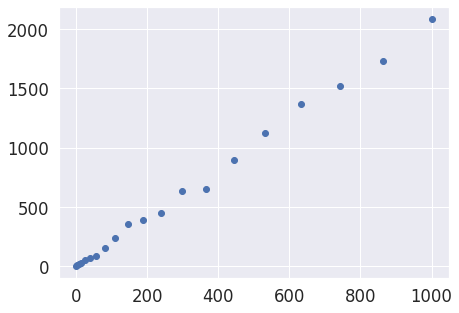

In [ ]:
plt.scatter(x**3, y);

That worked well, which makes sense: the original data was cubic in $x$. We can overdo it, too: let's try $x^5$.

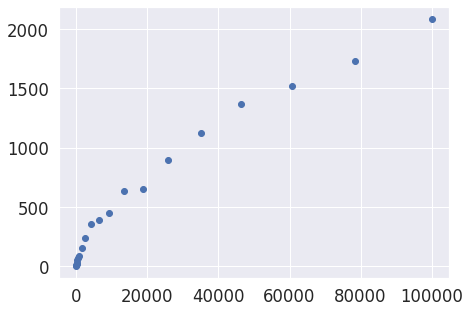

In [ ]:
plt.scatter(x**5, y);

Now, the data follows some sort of square root relationship. It's certainly not linear; this goes to show that not all power transformations work the same way, and you'll need some experimentation.

Let's instead try taking the log of y from the original data.

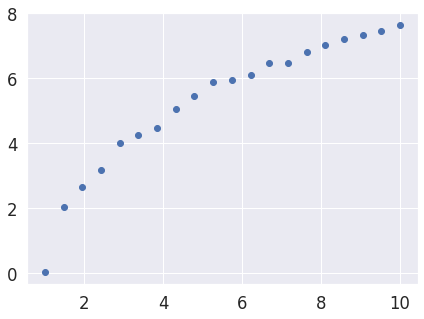

In [ ]:
plt.scatter(x, np.log(y));

On it's own, this didn't quite work! Since $y = 2x^3$, $\log(y) = \log(2) + 3\log(x)$.

That means we are essentially plotting `plt.scatter(x, np.log(x))`, which is not linear.

In order for this to be linear, we need to take the log of $x$ as well:

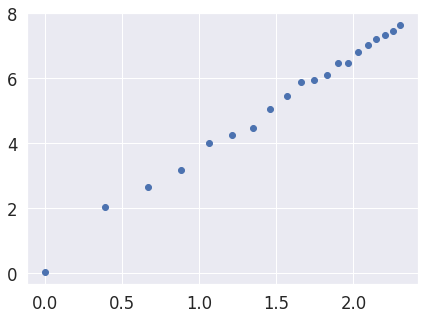

In [ ]:
plt.scatter(np.log(x), np.log(y));

The relationship being visualized now is

$$\log(y) = \log(2) + 3 \log(x)$$

## Kepler's third law

Details and data [can be found on Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law_of_Kepler).

In [ ]:
planets = pd.read_csv("https://busan302.mycourses.work/data/planets.data", delim_whitespace=True, comment="#")
planets

,planet,mean_dist,period,kepler_ratio
0,Mercury,0.389,87.77,7.64
1,Venus,0.724,224.70,7.52
2,Earth,1.000,365.25,7.50
3,Mars,1.524,686.95,7.50
4,Jupiter,5.200,4332.62,7.49
5,Saturn,9.510,10759.20,7.43


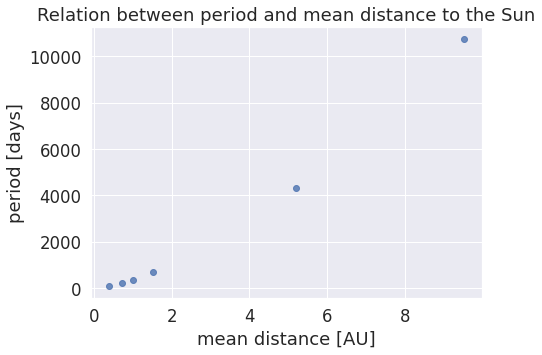

In [ ]:
ax = sns.regplot(x='mean_dist', y='period', data=planets, fit_reg=False);
ax.set_title('Relation between period and mean distance to the Sun')
ax.set_xlabel('mean distance [AU]')
ax.set_ylabel('period [days]');

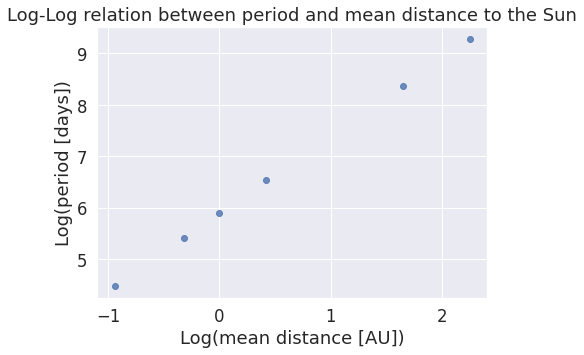

In [ ]:
ax = sns.regplot(x=np.log(planets['mean_dist']), y=np.log(planets['period']), fit_reg=False)
ax.set_title('Log-Log relation between period and mean distance to the Sun')
ax.set_xlabel('Log(mean distance [AU])')
ax.set_ylabel('Log(period [days])');

In fact, Kepler's law actually states that:


$$
T^2\propto R^3
$$

For Kepler this was a data-driven phenomenological law, formulated in 1619. It could only be explained dynamically once Newton introduced his law of universal gravitation in 1687.

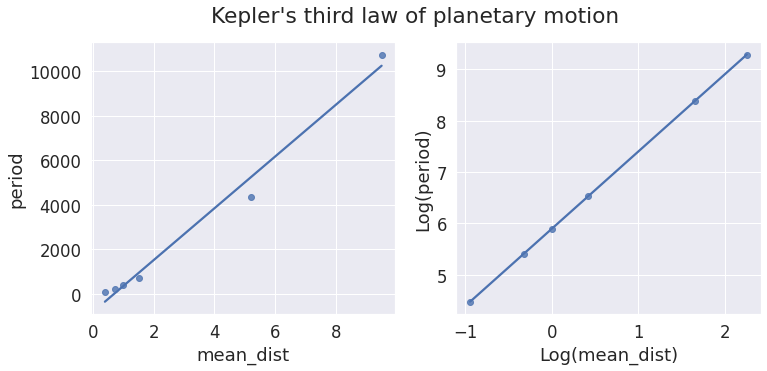

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x='mean_dist', y='period', data=planets, ax=ax1, ci=False);

sns.regplot(x=np.log(planets['mean_dist']), y=np.log(planets['period']), ax=ax2);
ax2.set_xlabel('Log(mean_dist)')
ax2.set_ylabel('Log(period)')
ax2.relim()
ax2.autoscale_view()
fig.suptitle("Kepler's third law of planetary motion");

# Scaling variables

Feature scaling is one of the most important data preprocessing step in machine learning. Many algorithms compute the distance between the features and their results will be biased towards features that have larger values. We need to scale all of the values to take advantage of these algorithms. 

Normalization both standardization are techniques used to transform features (a.k.a. columns, variables) to be on a similar scale. 


## Standardization

Standardization is generally done on normal distributions. It refers to centering the data around the mean such that standard deviation is one.

$$X_{new} = ( X - mean(X) ) / Std(X) $$

<img src='https://busan302.mycourses.work/images/AfterStandardization.gif' width=550>

- Mean and standard deviation is used for scaling.
- It is used when we want to ensure zero mean and unit standard deviation.
- It is not bounded to a certain range.
- It is much less affected by outliers.
- Scikit-Learn (sklearn) provides a transformer called **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)** for standardization.
- It is useful when the feature distribution is Normal or Gaussian.
- It is a often called as **Z-Score Normalization**.

<hr>

## Normalization
Normalization or Min-Max scaling can be done on any distribution. It refers to scaling the data between a particular range i.e., a minimum to a maximum.

The new point is calculated as:

$$X_{new} = (X - X_{min})/(X_{max} - X_{min})$$

<img src='https://busan302.mycourses.work/images/NormalizeEqn.jpg' width=350>

- Minimum and maximum value of features are used for scaling
- Scales values between [0, 1] or [-1, 1]
- It is really affected by outliers.
- Scikit-Learn (sklearn) provides a transformer called **[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)** for Normalization.
- It is useful when we don’t know about the distribution
- It is a often called as **Scaling Normalization**

[Source 1](https://www.linkedin.com/pulse/confused-between-normalization-vs-standardization-when-mukesh-manral/)
[,2](https://www.geeksforgeeks.org/normalization-vs-standardization/)

In [ ]:
## Practice:

In [ ]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


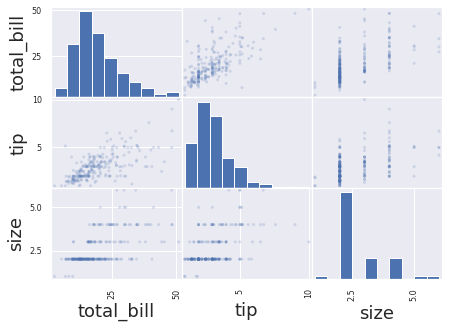

In [ ]:
# Let's look a little at the data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(data, alpha=0.2);


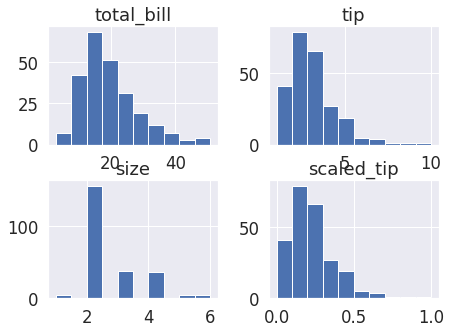

In [ ]:
# MinMaxScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data['scaled_tip'] = mm.fit_transform( data[['tip']] )
data.hist();


Note that the tip variable is right skewed. i.e., there are many more lower tips than there are larger tips. When we scale the tips the shape of the distribution remains the same.

## Transforming distribution of data
Now consider the shape of 'tips'. Can we make it more of a normal distribution?

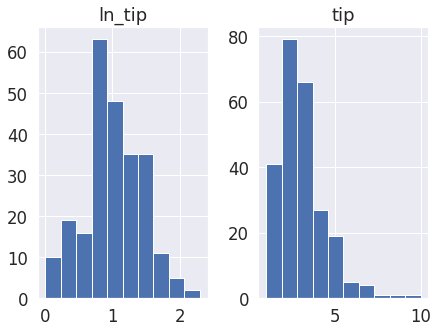

In [ ]:
import numpy as np

# We can take the log without fear because tips are always positive!
data['ln_tip'] = np.log( data['tip'] ) 
data.hist(['ln_tip','tip']);

## Standardizing ln tips

[StandardScaler docs are here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Notice how transformed tip is no longer quite so right skewed. It is more like the normal distribution.
<img src="https://busan302.mycourses.work/images/Empirical_Rule.PNG" width=450>

Let's try to standardize it then!


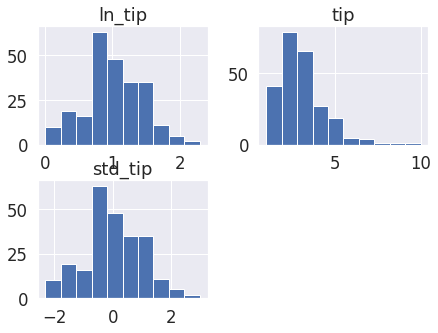

In [ ]:
# StandardScaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

data['std_tip'] = ss.fit_transform( data[['ln_tip']] ) 
data.hist(['ln_tip','tip','std_tip']);

Notice how the units on the histograms have changed! 
- tips went up to about $10
- log transformed tips (ln_tip) went zero to just over 2
- the standardized tips (std_tip) goes from around -2 to 2 standard deviations. 

The standardized normal distribution is cool. The distribution's mean is zero. The unites are measured in what are called **standard deviations**. Most of the observations are within two standard deviations. This is known as the **Empirical Rule**. 
<img src="https://busan302.mycourses.work/images/Empirical_Rule.PNG" width=350>

In a standardized normal distribution, about 95% of the observations are expected to be within 2 standard deviations. So cool!

### Now let's consider the relationship between tips and the total_bill

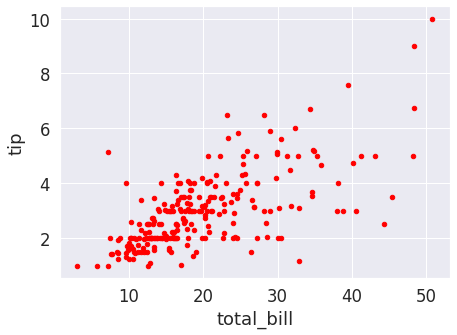

In [ ]:
data.plot.scatter(x="total_bill", y="tip", color="red");

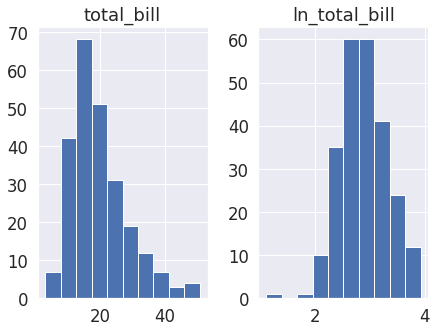

In [ ]:
# Let's look at total_bill
data['ln_total_bill'] = np.log(data['total_bill'])
data.hist(['total_bill','ln_total_bill']);

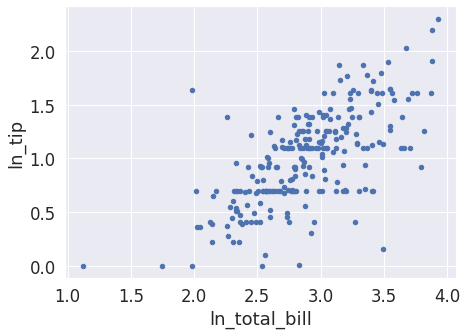

In [ ]:
data.plot.scatter(x='ln_total_bill', y='ln_tip');

In [ ]:
### It doesn't look like we gain very much doing this.
data.corr()

,total_bill,tip,size,scaled_tip,ln_tip,std_tip,ln_total_bill
total_bill,1.000000,0.675734,0.598315,0.675734,0.651362,0.651362,0.956879
tip,0.675734,1.000000,0.489299,1.000000,0.955490,0.955490,0.654368
size,0.598315,0.489299,1.000000,0.489299,0.481202,0.481202,0.589640
scaled_tip,0.675734,1.000000,0.489299,1.000000,0.955490,0.955490,0.654368
ln_tip,0.651362,0.955490,0.481202,0.955490,1.000000,1.000000,0.679570
std_tip,0.651362,0.955490,0.481202,0.955490,1.000000,1.000000,0.679570
ln_total_bill,0.956879,0.654368,0.589640,0.654368,0.679570,0.679570,1.000000


In [ ]:
# Let's get rid of the transformed variables.
data = data[['total_bill','tip','sex','smoker','day','time','size']]

# One-hot encoding (i.e., dummy variables)
Up until now, we've spent all of our time on numeric variables. Let's now turn to the qualitative variables (i.e., non-numeric) that we have in the data set.

We can think of these variables as being one of:
- unstructured -- free text (not of interest to us now)
- categorical -- representing a category
- ordinal -- categories that are related by a scale. Cars often have 4, 6, 8 or (rarely) 12 cylanders.

In this section, we will cover how to transform categorical and ordinal variables into numeric variables that can be used in our models. 

One hot encoding is machine learning lingo. It refers to electrical diagrams where one circuit is closed and said to be hot. Economists call them dummy variables (I have no idea why!).
<img src="https://busan302.mycourses.work/images/one_hot_encoding.png" width=250>

When we transform categorical data (like the two letter code for a US state) to numeric data, we use a numeric variable (or a dummy.) For each state, we create a separate numeric variable set to 0 if false and 1 if true.

In the example below, you can see how the dummy variables are set.
<img src='https://busan302.mycourses.work/images/one_hot_state.png' width=500>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


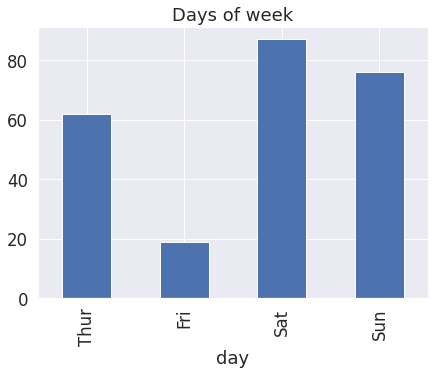

In [ ]:
data['count'] = 1 # for each tip!
data.groupby(['day'])['count'].count().plot.bar(title="Days of week");

In [ ]:
# Use replace to create numeric categories
# This is for example purposes only. I wouldn't treat this data this way. 
# It's clear that counts of tips by day are not ordinal.
# However, for the sake of example, we make 3 ordered groups: Thu, Fri, Weekend
data['day_grp']  = data['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun':2})
# Note that Thur is set to zero. In a regression, Thursday would be the baseline we would compare the other days to.
data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,total_bill,tip,sex,smoker,day,time,size,count,day_grp
0,16.99,1.01,Female,No,Sun,Dinner,2,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,2


## Make dummies

The pandas call [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) automatically transforms categorical data to dummies. There is a similar function for Series.

In [ ]:
# Make dummies
dd = pd.get_dummies(data=data, drop_first=True)
dd

,total_bill,tip,size,count,day_grp,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,2,1,1,0,0,1,1
1,10.34,1.66,3,1,2,0,1,0,0,1,1
2,21.01,3.50,3,1,2,0,1,0,0,1,1
3,23.68,3.31,2,1,2,0,1,0,0,1,1
4,24.59,3.61,4,1,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,2,0,1,0,1,0,1
240,27.18,2.00,2,1,2,1,0,0,1,0,1
241,22.67,2.00,2,1,2,0,0,0,1,0,1
242,17.82,1.75,2,1,2,0,1,0,1,0,1


Note that it made dummies for all the right variables. We used the option **drop_first** to ensure that the first catgory was dropped. For example, there aren't dummies for both Male and Female but just Female. We don't want both dummies in this case because the columns would be perfectly correlated: a person can be either male or female.

Note that get_dummies also left the **day_grp** ordered column in place.

In [ ]:
# Okay, let's drop the silly day_grp column!
data.drop('day_grp', axis=1, inplace=False) 
data.head()

,total_bill,tip,sex,smoker,day,time,size,count,day_grp
0,16.99,1.01,Female,No,Sun,Dinner,2,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,2


#### Making bins

Binning is a technique of grouping together values of continuous variables into n number of bins. Binning can also be called a discretization technique as we are dividing or partitioning a continuous variable to a discrete variable.

Sometimes using a discrete variable than a continuous variable is better for some machine learning algorithms. For example: having a continuous variable like age can be used better and more interpretable if we convert it into age brackets. Binning continuous variables also help in nullifying the effect of outliers.

Pandas have two functions to bin variables i.e. cut() and qcut().

**qcut():** qcut is a quantile based discretization function that tries to divide the bins into the same frequency groups. If you try to divide a continuous variable into five bins and the number of observations in each bin will be approximately equal.

**cut():** The cut function is also used for discretization of a continuous variable. With the qcut function, we aim to keep the number of observations in each of the bins equal, and we don’t specify where we want to make the split preferably just the number of bins required. In the case cut function, we explicitly provide the bin edges. There is no guarantee about the distribution of observation in each bin will be equal. 

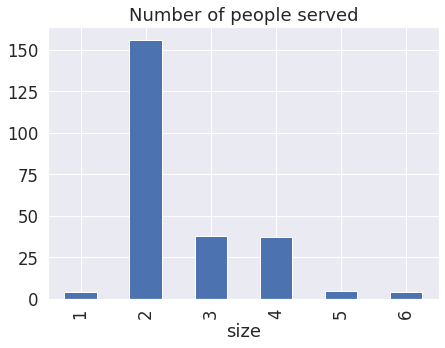

In [ ]:
# Now consider the size the groups
data.groupby(['size'])['count'].count().plot.bar(title="Number of people served");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


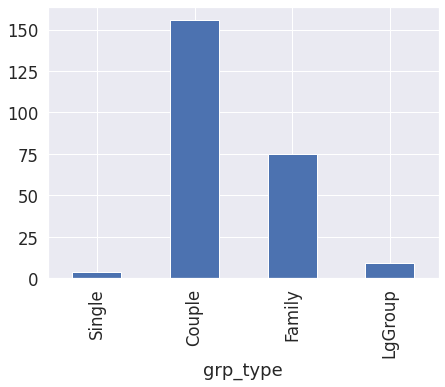

In [ ]:
#define bins 
bins = [0,1, 2, 4, 10]

#name of groups
groups = ['Single', 'Couple', 'Family', 'LgGroup']

data['grp_type'] = pd.cut(data['size'], bins=bins, labels=groups)

data.groupby(['grp_type'])['count'].count().plot.bar();

# Interested to learn more?
Pandas is a powerful library. There are many soures of information and tutorials.

[Here's one that I liked](https://www.analyticsvidhya.com/blog/2020/12/feature-engineering-using-pandas-for-beginners/)